In [213]:
import pickle
import numpy as np
from scipy import sparse
import pandas as pd
import seaborn as sns
import uuid
import matplotlib.pyplot as plt
#solved chinese display in matplotlib
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams["font.family"] = "DFKai-SB"
rcParams['axes.unicode_minus'] = False

from tqdm import tqdm_notebook,tnrange
from tqdm.autonotebook import tqdm
tqdm.pandas()
import sys
import regex as re
industry=['金融業', 'IC製造', 'IC設計', '電子零件元件', '電腦系統業', '石油及天然氣', '手機', '面板業', '太陽能',
       '板鋼', '被動元件', '車輛整車', '非鐵金屬', '流通業', '地產', '通訊設備', '遊戲產業', '印刷電路板相關',
       '貴金屬', '機械', '運輸事業', '電子通路', 'IC封裝測試', 'LED', '通訊服務', '消費性電子產品', '化學工業',
       '醫藥產業', '軟體業', '週邊產品', '石化業', '旅館、餐飲', '汽機車零組件', '設備儀器廠商', '條鋼', '造紙業',
       '水泥', '橡膠工業', '傳產其他', '數位相機', '顯示器', '不鏽鋼', '農林漁牧', '服務業', 'Internet相關',
       '營造工程', '休閒娛樂', '紡織中游', '生物科技', '家電', '光碟片', '建材', '成衣', '電力', '運動產業',
       '線材、盤元', '化纖原料', '其他公用事業', '大宗物資', '家居用品', '手機零組件', '食品加工', '電力設備',
       '航天軍工', '分離式元件', '電子其他', '面板零組件', '飲料相關', '電線電纜', '封測服務與材料', '礦石開採',
       '光通訊', '傳播事業', '輔助與彌補用醫材', '時尚產業', '基礎建設營運', '電聲產品', '水資源', '醫療器材通路',
       '合金鋼', '文化創意產業', '車用金屬成型', '穿戴式裝置', '其他醫療器材', '汽車內裝', '車用電子',
       '診斷與監測用醫材', '傳輸介面', '電子化工材料', '電池材料相關', '資產股', '醫療管理服務', '體外診斷用醫材', '煤',
       '射頻前端晶片', '控股公司', '無店舖販售', '手術與治療用醫材', '金屬礦採選', '生物辨識相關']

#### Load News

In [2]:
News=pd.read_pickle("D:4.AutoencoderForArticle.Mid-Industry/news_vip_clean_wo_duplicate_single_industry.p")

#### Load tokenizer

In [3]:
with open("D:4.AutoencoderForArticle.Mid-Industry/tokenizer.p","rb") as f:
    tokenizer=pickle.load(f)

In [13]:
def vectorizer(dictionary,dim=70000):
    def do(text):
        arr=np.zeros(dim,dtype=np.int8)
        text=set(text.split(" "))
        for word in text:
            idx=dictionary.get(word)
            if idx == None:break
            idx-=1
            if idx<dim :
                arr[idx]=1
        return arr
    return do        

In [126]:
def vectorizer_keras(tokenizer,dim=70000):
    tokenizer.num_words=dim
    def do(text):
        return tokenizer.texts_to_matrix([text]).astype(np.int8).squeeze()
    return do  

Vectors=News['title_token_plus_body_token'].progress_apply(vectorizer_keras(tokenizer))

In [266]:
X=np.zeros(70000)
def sumvecor(x):
    X=X+x
for i in tqdm_notebook(Vectors):
    X+=i

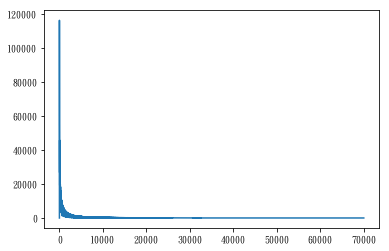

In [267]:
plt.plot(X)

In [268]:
(X==0).sum()

1

In [132]:
News["bow"]=Vectors

In [134]:
News.to_pickle("D:4.AutoencoderForArticle.Mid-Industry/News_vip_clean_bow_single.p")

#### guid to bow

In [203]:
dict_guid_bow=dict()
for g,v in tqdm_notebook(zip(News["guid"],Vectors)):
    dict_guid_bow[g]=v

In [204]:
sys.getsizeof(dict_guid_bow)

12583008

In [206]:
with open("D:4.AutoencoderForArticle.Mid-Industry/dict_guid_bow_single.p","wb") as f:
    pickle.dump(dict_guid_bow,f)

### guid to sparse bow

In [214]:
def vectorizer_keras(tokenizer,dim=70000):
    tokenizer.num_words=dim
    def do(text):
        return sparse.csr_matrix(tokenizer.texts_to_matrix([text]).astype(np.int8).squeeze())
    return do  

sparsebow=News['title_token_plus_body_token'].progress_apply(vectorizer_keras(tokenizer))

In [215]:
sparsebow.shape

(187843,)

In [216]:
dict_guid_sparsebow=dict()
for g,v in tqdm_notebook(zip(News["guid"],sparsebow)):
    dict_guid_sparsebow[g]=v

In [217]:
sys.getsizeof(dict_guid_sparsebow)

12583008

In [218]:
with open("D:4.AutoencoderForArticle.Mid-Industry/dict_guid_sparsebow_single.p","wb") as f:
    pickle.dump(dict_guid_sparsebow,f)

In [219]:
dict_guid_sparsebow[uuid.UUID('3e684ce0-a8c0-4230-aeea-01c2d67dee6c')]

<1x70000 sparse matrix of type '<class 'numpy.int8'>'
	with 65 stored elements in Compressed Sparse Row format>

#### add sparse bow to news table

In [248]:
News=News.drop(columns="bow")

In [250]:
News["sparse bow"]=sparsebow

In [260]:
News.to_pickle("D:4.AutoencoderForArticle.Mid-Industry/News_vip_clean_sparsebow_single.p")

#### dict industry to guid

In [274]:
News["medi-industry"]=News["medi-industry"].progress_apply(lambda x : list(x)[0])

In [282]:
dict_industry_guid=dict()
for ind in industry:
    guids=News[News["medi-industry"]==ind]["guid"].values
    dict_industry_guid[ind]=guids

In [291]:
with open("D:4.AutoencoderForArticle.Mid-Industry/dict_singleindustry_guid.p","wb") as f:
    pickle.dump(dict_industry_guid,f)